# Convolutional Neural Networks for Image Classification

### Reading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Akshay\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Label    Description

#### 0 - T-shirt/top
#### 1 - Trouser
#### 2 - Pullover
#### 3 - Dress
#### 4 - Coat
#### 5 - Sandal
#### 6 - Shirt
#### 7 - Sneaker
#### 8 - Bag
#### 9 - Ankle boot

### Reading the data

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

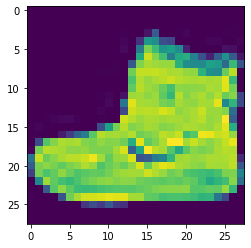

In [6]:
plt.imshow(x_train[0])

In [8]:
y_train[0]   # 9 -Ankle boot

9

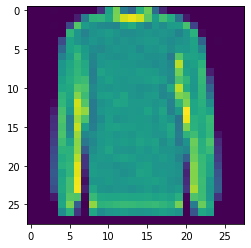

In [7]:
plt.imshow(x_train[45])

In [11]:
y_train[45]   # 2 - Pullover

2

## Normalising the data

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/255
x_test = x_test/255

###  Reshape the X arrays to include a 4 dimension of the single channel. 

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train = x_train.reshape(60000,28,28,1)

In [17]:
x_test = x_test.reshape(10000,28,28,1)

### Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_train_cat = to_categorical(y_train)

y_test_cat = to_categorical(y_test)

In [21]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_train_cat.shape

(60000, 10)

### Model building

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [24]:
model = Sequential()

# CONVOLUTION LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# DENSE LAYERS
model.add(Dense(units=128,activation="relu"))

# LAST LAYER FOR THE CLASSIFICATION
model.add(Dense(units=10,activation="softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [27]:
model.fit(x_train,y_train_cat,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 44s 735us/sample - loss: 0.3999 - acc: 0.8570
Epoch 2/10
60000/60000 [==============================] - 44s 734us/sample - loss: 0.2780 - acc: 0.9002
Epoch 3/10
60000/60000 [==============================] - 43s 713us/sample - loss: 0.2423 - acc: 0.9126
Epoch 4/10
60000/60000 [==============================] - 44s 726us/sample - loss: 0.2184 - acc: 0.9226
Epoch 5/10
60000/60000 [==============================] - 43s 717us/sample - loss: 0.2004 - acc: 0.9286
Epoch 6/10
60000/60000 [==============================] - 44s 727us/sample - loss: 0.1863 - acc: 0.9338 - loss: 0.1860 
Epoch 7/10
60000/60000 [==============================] - 44s 727us/sample - loss: 0.1760 - acc: 0.9379
Epoch 8/10
60000/60000 [==============================] - 44s 731us/sample - loss: 0.1682 - acc: 0.9412
Epoch 9/10
60000/60000 [==============================] - 41s 680us/sample - loss: 0.1616 - acc: 0.9429


# Evaluating the model

In [28]:
model.metrics_names

['loss', 'acc']

In [29]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 3s 273us/sample - loss: 0.3096 - acc: 0.9082


[0.309641402977705, 0.9082]

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions = model.predict_classes(x_test)

In [33]:
y_test_cat.shape

(10000, 10)

In [48]:
y_test_cat[10]    # 11th row in x_test   # label is 4 ,its a coat 

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
predictions[10]

4

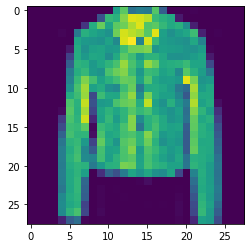

In [50]:
plt.imshow(x_test[10])

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.82      0.89      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.76      0.72      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

